In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df=pd.read_csv("data/train.csv")
test_df=pd.read_csv("data/test.csv")
testlabel_df=pd.read_csv("data/test_label.csv")

In [13]:
testlabel_df.dtypes

timestamp_(min)    float64
label                int64
dtype: object

In [9]:
train_df.dtypes

timestamp_(min)    float64
feature_0          float64
feature_1          float64
feature_2          float64
feature_3          float64
feature_4          float64
feature_5          float64
feature_6          float64
feature_7          float64
feature_8          float64
feature_9          float64
feature_10         float64
feature_11         float64
feature_12         float64
feature_13         float64
feature_14         float64
feature_15         float64
feature_16         float64
feature_17         float64
feature_18         float64
feature_19         float64
feature_20         float64
feature_21         float64
feature_22         float64
feature_23         float64
feature_24         float64
dtype: object

In [15]:
# Fix Data Types
# -------------------------------

# Ensure all feature columns are floats
feature_cols = [col for col in train_df.columns if col.startswith("feature_")]
train_df[feature_cols] = train_df[feature_cols].apply(pd.to_numeric, errors='coerce')

In [17]:
# -------------------------------
# Remove Duplicates
# -------------------------------
original_rows = train_df.shape[0]
train_df.drop_duplicates(inplace=True)
print(f"Removed {original_rows - train_df.shape[0]} duplicate rows.")

Removed 0 duplicate rows.


In [19]:
# -------------------------------
# Summary Statistics
# -------------------------------
summary = train_df[feature_cols].describe().T[['mean', '50%', 'std', 'min', 'max']]
summary.rename(columns={'50%': 'median'}, inplace=True)
print("\n📊 Summary Statistics:")
print(summary)


📊 Summary Statistics:
                mean    median       std       min       max
feature_0   0.835810  0.837290  0.067326  0.486490  1.000000
feature_1   0.840205  0.843873  0.039472  0.525682  0.909956
feature_2   0.634216  0.603304  0.102920  0.421484  1.000000
feature_3   0.575081  0.572077  0.049675  0.380874  0.676682
feature_4   0.543310  0.548428  0.089438  0.065106  0.929442
feature_5   0.511753  0.507439  0.077771  0.110161  0.877493
feature_6   0.549268  0.539773  0.064093  0.215909  1.000000
feature_7   0.537706  0.529834  0.090120  0.077795  0.968278
feature_8   0.551133  0.552253  0.078996  0.038693  0.935128
feature_9   0.545177  0.545577  0.081033  0.040358  0.915990
feature_10  0.536872  0.537551  0.077413  0.039544  0.916855
feature_11  0.594350  0.587961  0.091992  0.055413  1.000000
feature_12  0.162954  0.161464  0.011247  0.136354  0.519780
feature_13  0.147978  0.146551  0.009733  0.125056  0.508938
feature_14  0.214346  0.212650  0.013735  0.173883  0.465900
f

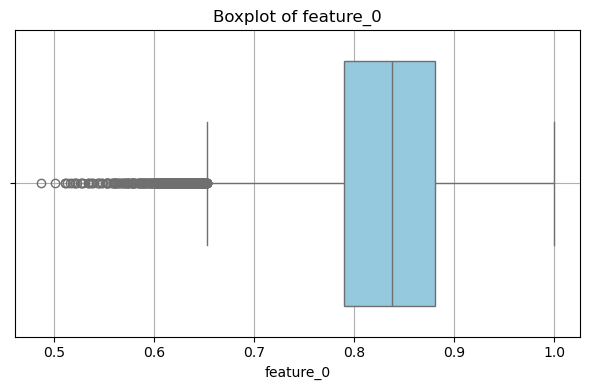

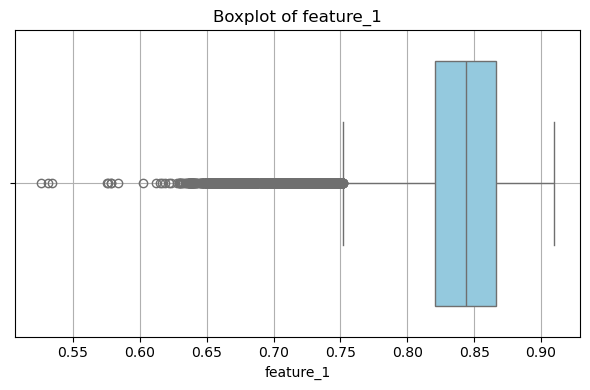

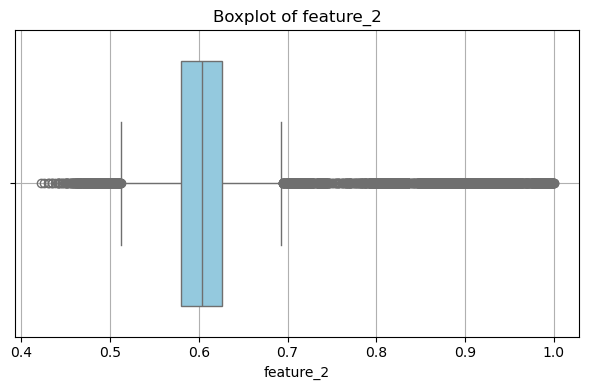

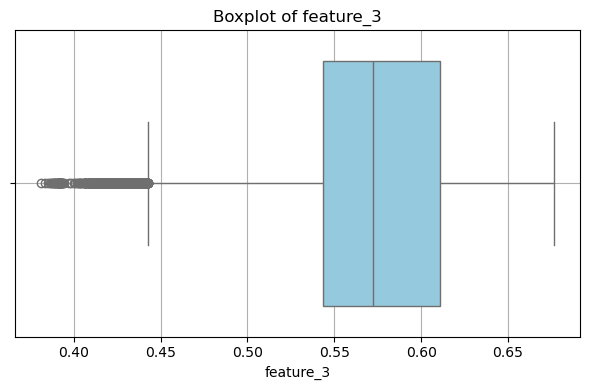

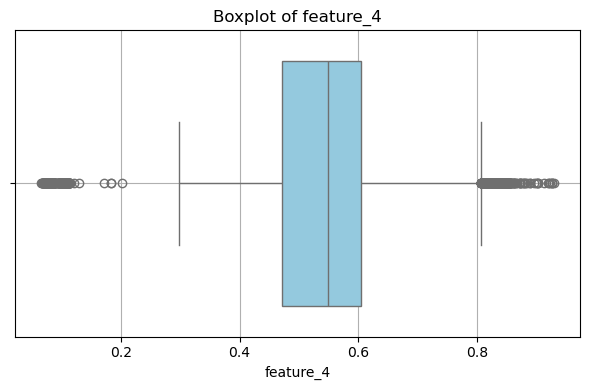

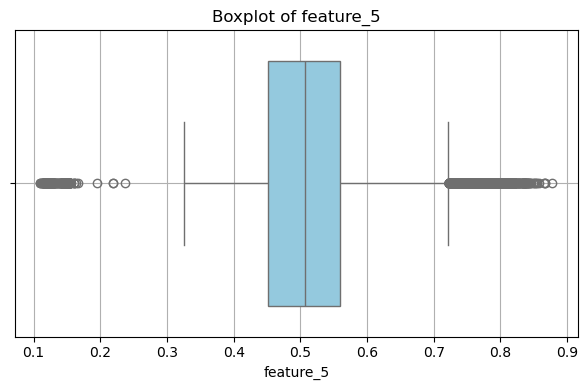

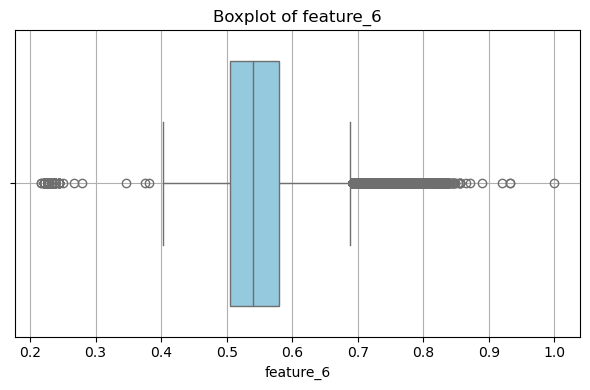

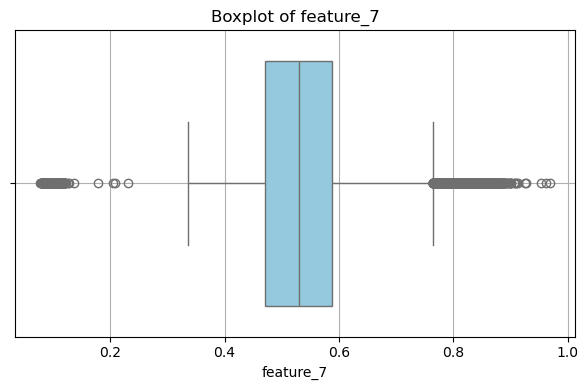

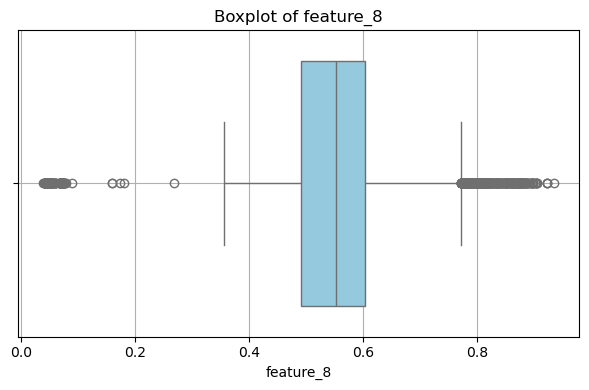

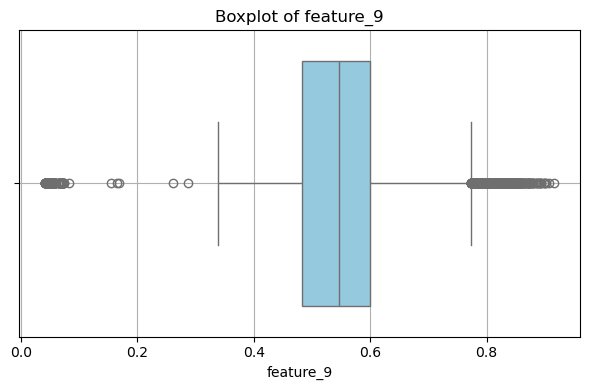

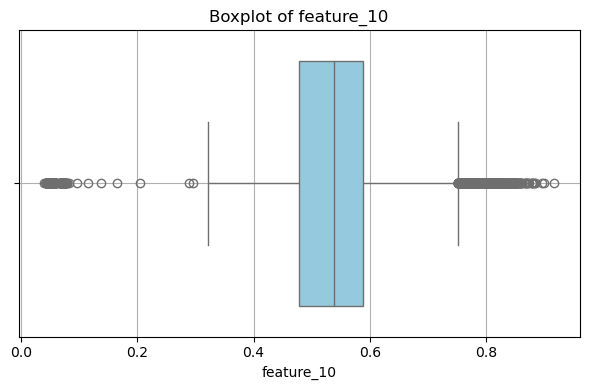

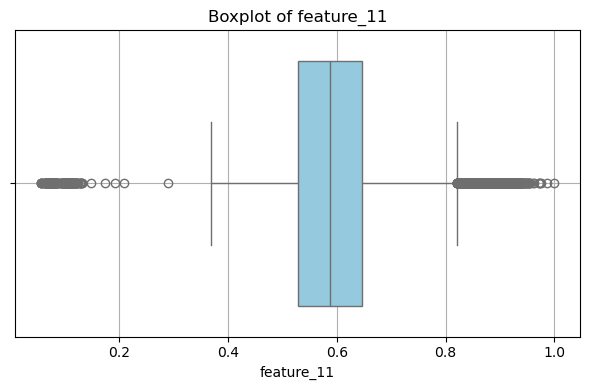

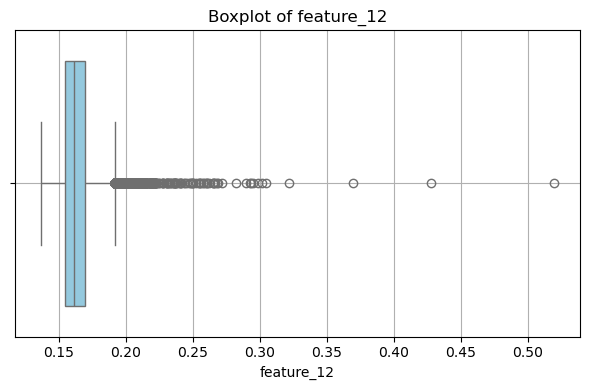

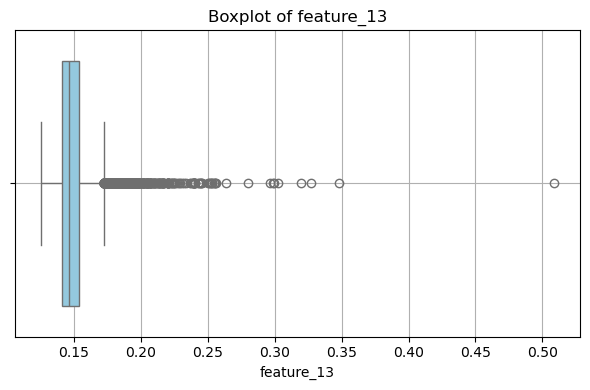

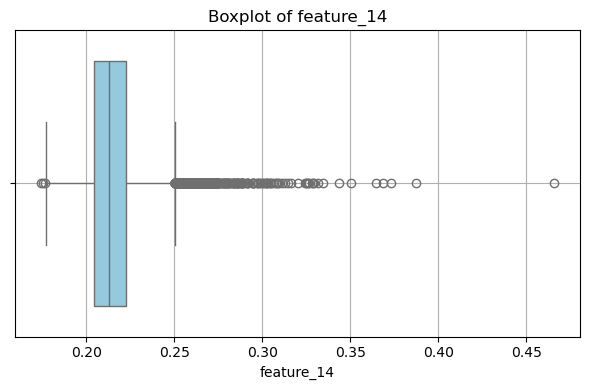

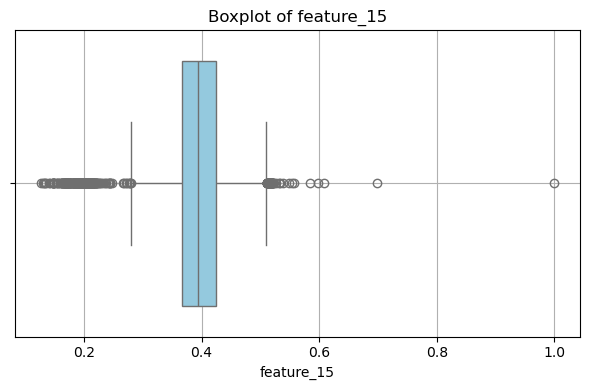

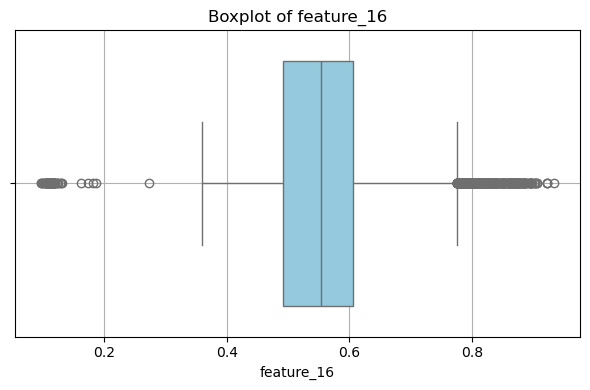

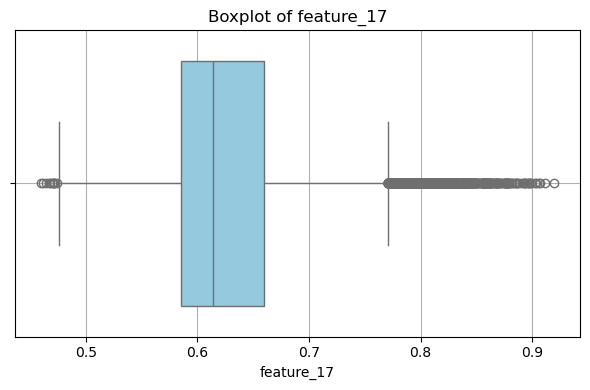

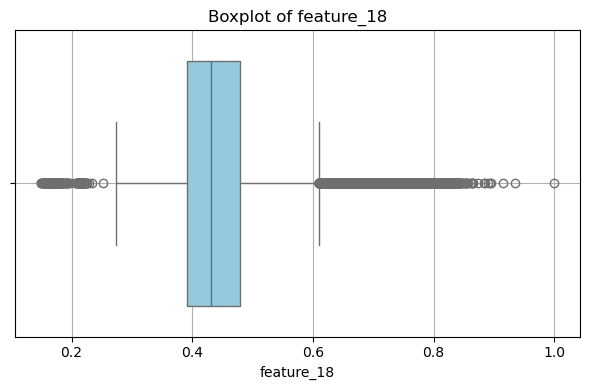

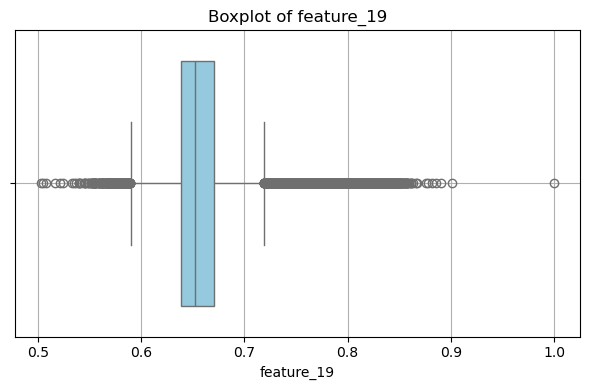

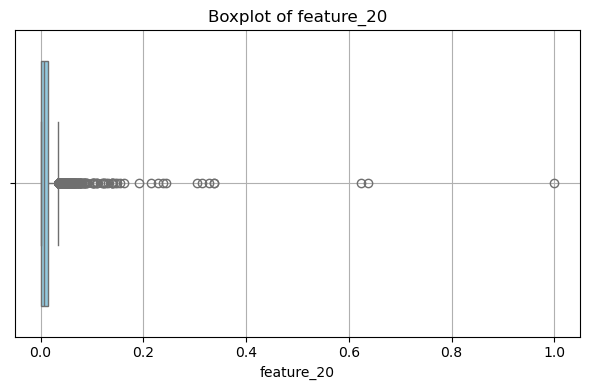

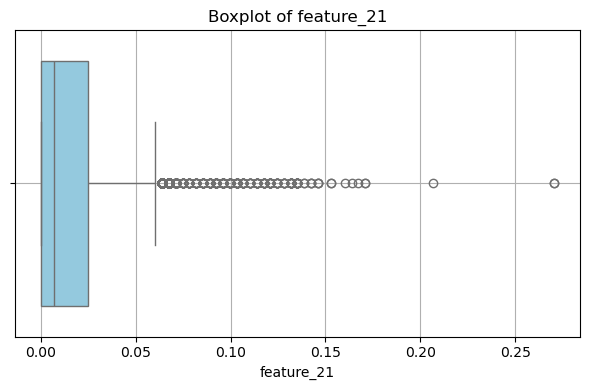

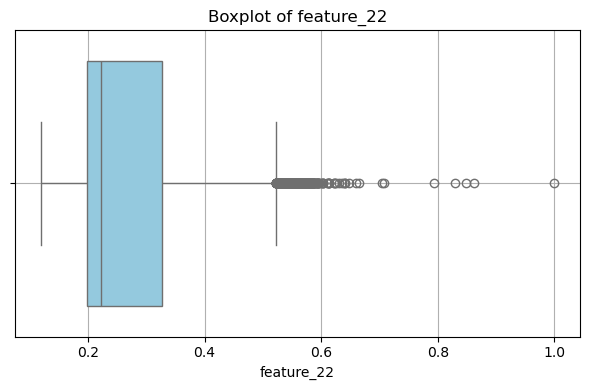

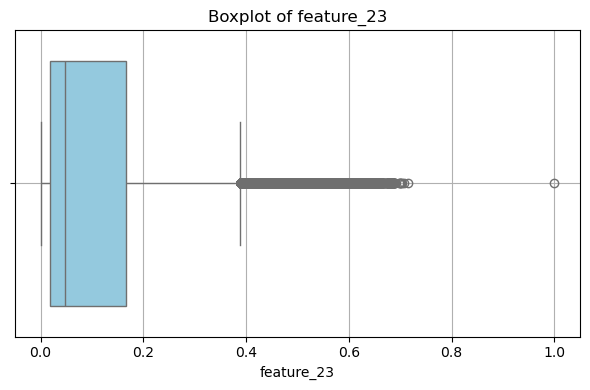

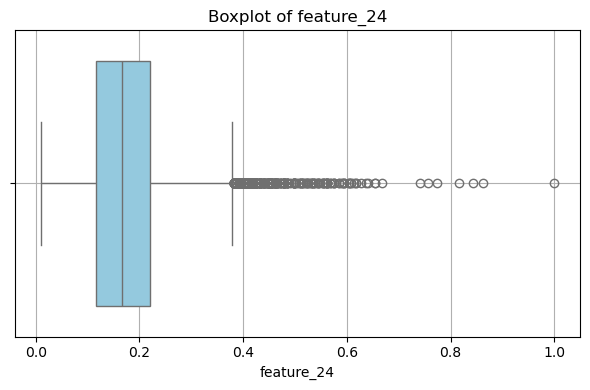

In [29]:
feature_cols = [col for col in train_df.columns if col.startswith("feature_")]

# Plot a boxplot for each feature
for col in feature_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train_df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


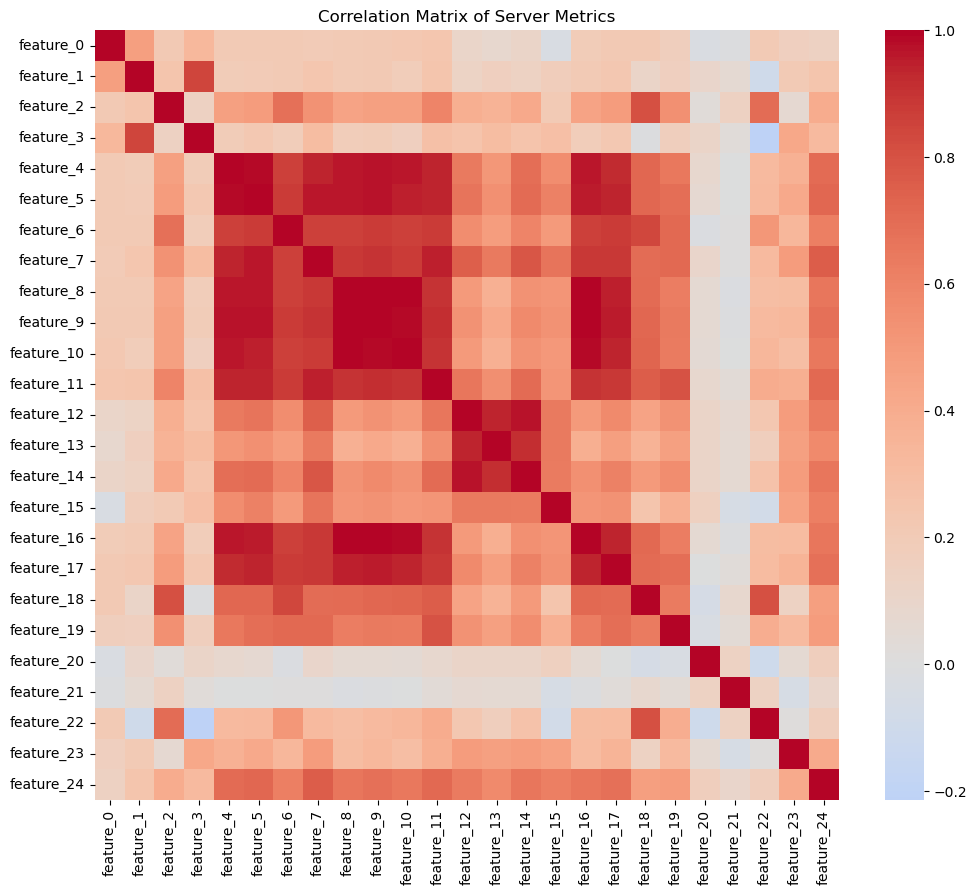

In [31]:
# -------------------------------
# Correlation Matrix
# -------------------------------
plt.figure(figsize=(12, 10))
corr = train_df[feature_cols].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Server Metrics")
plt.show()
